# Homework 6 (Julia Problems)
## Math 314 Fall 2024

## Problem 7.14 (again)

The convolution $a*b$ of vectors $a$ and $b$ can be
written in terms of matrix multiplication.  This isn't the
most efficient way to perform convolution, but thinking about the matrix form can help you learn how convolution works.

If $a$ is a 4-vector, we define
$$
T_3(a) = \begin{bmatrix} 
a_1 & 0 & 0 \\
a_2 & a_1 & 0\\
a_3 & a_2 & a_1\\
a_4 & a_3 & a_2 \\
0 & a_4 & a_3 \\
0 & 0 & a_4
\end{bmatrix}
$$

The subscript 3 indicates the number of columns.

The point of the matrix $T_3(a)$ is that it lets you compute convolution.
Specifically, if $b$ is a 3-vector then $a*b$ is the 
same as the matrix multiplication $T_3(a) b$.

The matrix $T_3(a)$ is called a Toeplitz matrix.  Your 
first job is going to be to write a function that creates Toeplitz matrices so that you can compute convolution. But I need to explain a few things about coding first, in case you haven't run into loops before.

### Iteration
The key new skill needed is called iteration. Here are some of the basics. Suppose we want to print out all the numbers from 1 to 10. Not a super useful task, but its an ok place to start.  To do this we use something called a `for` loop.  It looks like this:

```
for k in 1:10
  # Do stuff here that depends on the value of `k`
  println(k)
end
```

In a `for` loop, we repeat the body of the loop (in this case just the `println(k)`) a number of times.  The `k in 1:10` part indicates that the variable `k` is going to change each time we go around the loop.  The first time through, the value is 1. The second time it is 2.  The final time through the loop the value is 10.  Here are the results:

In [1]:
for k in 1:10
    println(k)
end

1
2
3
4
5
6
7
8
9
10


### Making a matrix

Let's construct an $n\times n$ matrix $A$ that looks like the 
identity, except that instead of 1's on the diagonal, $A_{kk}=k$.

Here's code that does this, with the desired size of the matrix kept 
in the variable `n`.  Note that we first create a zero matrix of the right shape, and then we update the nonzero entries in a loop.

In [2]:
n = 5
A = zeros(n, n)
for k in 1:n
    A[k,k] = k
end
A

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  4.0  0.0
 0.0  0.0  0.0  0.0  5.0

Here's another example, a matrix that has ones on the other diagonal, not the main diagonal. (You should be able to articulate what the result of $Ax$ is if $x$ is a vector...)

In [4]:
n = 5
A = zeros(n, n)
for j in 1:n # for each column j
    # Set the correct entry of the column to a 1. 
    # The formula is a little tricky:
    # In column 1, the row with a 1 should be n
    # In column 2, the row with a 1 should be n - 1
    # In column 3, the row with a 1 should be n - 2
    #
    # Stare at this pattern long enough and you should convince yourself
    # that in column j the 1 goes in row n - j + 1
    A[n-j+1, j] = 1
end
A

5×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

It's not unusual to have nested loops.
Suppose you want a matrix $A$ with $A_{ij}=i-j$.
Here's how:

In [64]:
n = 5
A = zeros(n, n)
for i in 1:n # For each row `i`
    for j in 1:n # For each column `j`
        A[i,j] = i-j
    end
end
A


5×5 Matrix{Float64}:
 0.0  -1.0  -2.0  -3.0  -4.0
 1.0   0.0  -1.0  -2.0  -3.0
 2.0   1.0   0.0  -1.0  -2.0
 3.0   2.0   1.0   0.0  -1.0
 4.0   3.0   2.0   1.0   0.0

### Your turn: making a Toepliz matrix.

Ok, finally it's your turn.  Write a function `toeplitz`
that takes two arguments, a vector $a$ and an integer $n$
and returns the matrix $T_n(a)$.  If $a$ has dimenion $m$,
the matrix will be an $(n+m-1) \times n$ matrix.  
The first column will start with all the entries of $a$
and then remaining zeros.  The second column will start with
one zero, and then the entries of $a$ and then remaining zeros. The third column will start with two zeros, and then the entries of $a$ and then remaining zeros.  Etc.  

The natural way to do this iteration is to first iterate over the columns.  Then, for each column, copy $a$ into the right location. The most straightforward way to do this (though not the slickest, and that's ok!) is to iterate over the size of $a$ and copy the corresponding entry of $a$ into the correct spot in the column.

I've started the code for you. Your job is to fill in the body of the loop.

In [5]:
function toeplitz(a, n)

    # Determine the dimension of `a`
    m = length(a)

    # Make an all zeros matrix of the right dimensions.
    A = zeros(m+n-1, n)

    # Now fill in the non-zero entries of `A`

    for j in 1:n # For each column `j`
        for k in 1:m # for each entry of the vector `a`

            # Your code goes here.  
            # Fill in an appropriate entry 
            # of `A` depending on `j` and `k`

        end
    end 

    return A
end

toeplitz (generic function with 1 method)

Test that your function works by computing $T_3(a)$ with $a=(1,2,3,4)$.

The call `toeplitz( [1, 2, 3, 4], 3)` should yield:

```
6×3 Matrix{Float64}:
 1.0  0.0  0.0
 2.0  1.0  0.0
 3.0  2.0  1.0
 4.0  3.0  2.0
 0.0  4.0  3.0
 0.0  0.0  4.0
```

In [ ]:
toeplitz([1, 2, 3, 4], 3)

### Rainfall example

Once your `toeplitz` function works, we can compute 
convoltion with the vector $g$ from problem 7.14 to determine river heights.

In [ ]:
g = [ 0.1, 0.4, 0.5, 0.2 ]
G = toeplitz(g, 6)

The cell below will plot the effect of one inch of rainfall
on day 1 according to the model above. Run the cell below to 
see if you obtain the right graph!

In [ ]:
import Plots

r = [ 1, 0, 0, 0, 0, 0 ]
h = G * r
day = 1:9

Plots.plot(day, h, marker=:circle,
    title="River height anomaly over time",
    xlabel="Day", ylabel="height anomaly (in)",
    legend=nothing)

If all goes well, your plot should look like this:
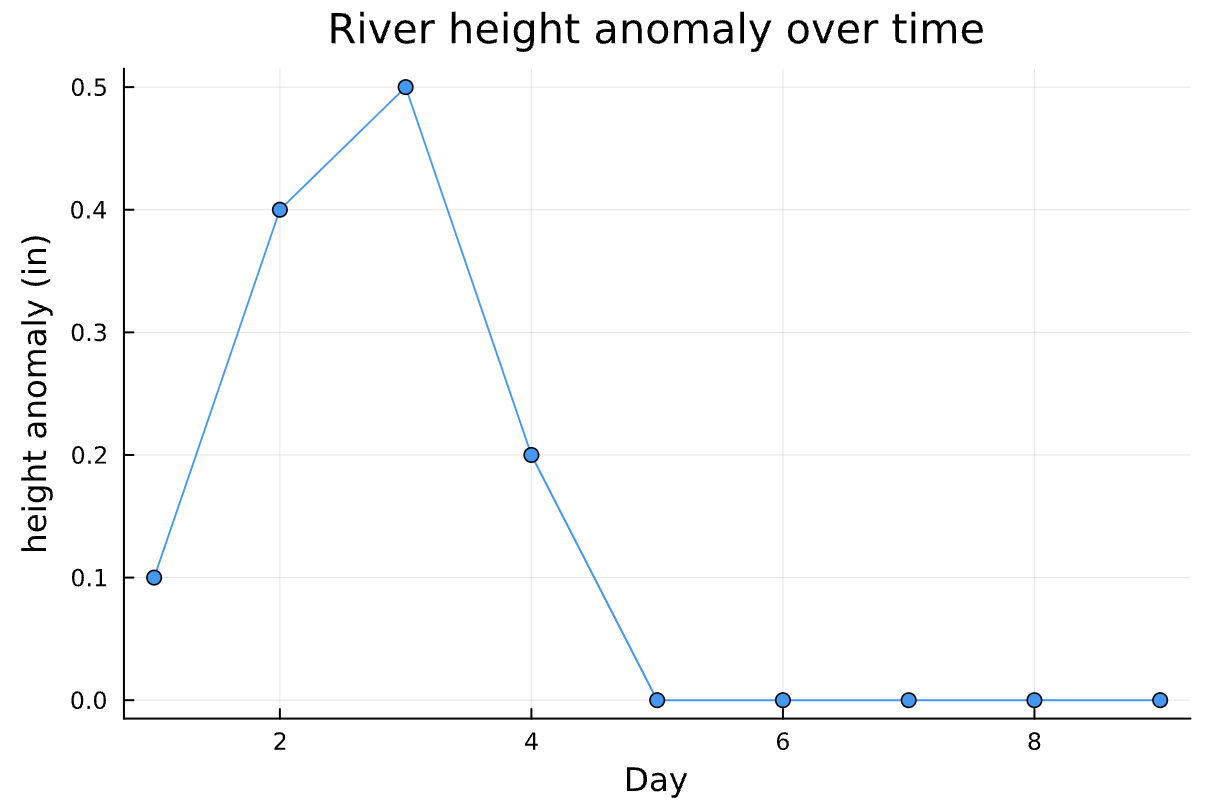

Generate a similar graph but with two time series. 
* The first has 
one inch of rainfall on day one and nothing else, just like the above.
* The second has two inches of rainfall on day 2, but nothing else

Recall that to layer a second plot on an existing one requires "!"

In [ ]:
# Your plot code goes here.


Generate a similar graph, but now with one time series corresponding to one inch of rainfall on day 1 and also two inches on day 2.

In [ ]:
# Your plot code goes here.


Generate a similar graph, but now with one time series corresponding to one inch of rainfall on day 1 and one inch of rainfall on day 6.

In [ ]:
# Your plot code goes here.


## Problem **S7.3**

From the supplemental problem set:

"Audio filtering. When the vector $x$ represents an audio signal, and $h$ is another (usually much shorter) vector, the convolution $y = h * x$ is called the filtered version of $x$, and $h$ is called the filter impulse response. Filters can be used to smooth out audio signals (which reduces high frquency sounds and enhances low frequency sounds), or to sharpen them (which enhances high frequency sounds and reduces low frequency sounds), as in audio bass and treble tone controls. In this problem you will experiment with, and listen to, the effects of several audio filters."

### Convolution done right

Convolution is computation intensive.  However, there is a nearly miraculously fast way to do convolution that takes advantage of something called the Fast Fourier Transform. We'll talk about that later in the course.  All you need to know is that to do fast convolution, you need to add a package, `DSP`, which stands for "Digital Signal Processing".


In [ ]:
import Pkg
Pkg.add("DSP")
import DSP

To compute the convolution of two vectors, you use the `DSP.conv` function, like this:

In [72]:
a = [1, 2, 3]
b = [1, 2, 3]

DSP.conv(a,b)

5-element Vector{Int64}:
  1
  4
 10
 12
  9

We can check this is correct by using old-school multiplication by at Toeplitz matrix:

In [76]:

T = [1 0 0; 2 1 0; 3 2 1; 0 3 2; 0 0 3]
T*b

5-element Vector{Int64}:
  1
  4
 10
 12
  9

## Reading and Playing `.wav` files

I've provided you with an audio file, `U2-WOWY.wav`, which is 17 seconds of the classic U2 song from 1987,
*With or Without You*.  To read the file, play it, and work with the audio signal as a vector, we need the `WAV` package, which allows you to work with `.wav` files.

In [1]:
import Pkg
Pkg.add("WAV")
import WAV

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Library/CloudStorage/GoogleDrive-damaxwell@alaska.edu/My Drive/Classes/F314/Project.toml`
  No Changes to `~/Library/CloudStorage/GoogleDrive-damaxwell@alaska.edu/My Drive/Classes/F314/Manifest.toml`


You can read in the audio snippet as follows.  The variable `x` contains the signal data, and the variable `f` is the frequency in Hz.

In [2]:
x, f = WAV.wavread("U2-WOWU.wav");

The signal is a standard frequency for audio data, 44.1kHz:

In [3]:
f

44100.0f0

You can play the sample like this:

In [4]:
WAV.wavplay(x, f);

### Part a: Smoothing Filter

The following makes a 1ms smoothing filter.  Because the signal has a frequency of rougly 44kHz, 44000 samples is roughly a second, and 44 samples is rougly a millisecond.  Convolving with the vector `h_smooth` below is therefore averaging the signal over a 1 ms window at each sample.

In [5]:
import DSP

h_smooth = 1 / 44 * ones(44);
output = DSP.conv(h_smooth, x);
WAV.wavplay(output, f);

Your job: 
"Listen to the output signal and briefly describe the effect of convolving `h_smooth` with `x` in one sentence."

**Your response goes here**

### Part b: Echo Filter

This is part (b) of the supplemental problem, but modified just a bit:

What filter (i.e., vector) $h^{\rm echo}$ has the property that 
$h^{\rm echo} * x$ consists of the original recording, plus an echo of the original recording 0.25 seconds delayed, with **three-quarters** the original amplitude? Since sound travels at about 340m/s, this is equivalent to the effect of hearing an echo from a wall about 42.5m away. Construct $h^{\rm echo}$ using Julia and listen to the output signal $h^{\rm echo} * x$ to confirm the effect.
Form and listen to the signal $h^{\rm echo} * h^{\rm echo} * x$ and very briefly describe what you hear.

**Hint.** The entries of the output signal $y = h^{\rm echo} * x$
satisfy $y_i = x_i + 0.75x_{i−k}$, where $k$ is the number of samples 
in 0.25 seconds."



In [124]:
# Your code here to make `h_echo`


In [125]:
# Your code here to convolve to make x_echo and then play x_echo


In [126]:
# Your code here to doubly convolve ( h_echo * ( h_echo * x) ) and play.


**Your description here**